Universidad del valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de ciencias de la Computación <br>
Inteligencia Artificial <br>

Fredy Velasquez 201011 <br>


# Laboratorio 4: Regresión Lineal

Instrucciones: Usted usará Python a través de un Jupyter Notebook para llevar a cabo este ejercicio. Recuerde
utilizar comentarios para describir lo que está haciendo en cada parte del proceso. Estará usando el juego de datos
proporcionado dentro del portal. Al finalizar recuerde subir al portal un link a su repositorio en el que se pueda correr
su notebook, usando https://mybinder.org/.
El juego de datos proporcionado es parte de la plataforma Kaggle, dentro del cual se muestran los precios de casas
en King County, Seattle. Este juego de datos incluye los precios de las casas vendidas entre mayo 2014 y mayo
2015. Nótese que el precio es dependiente de varias características como el número de habitaciones, número de
baños, metros cuadrados de la sala, pisos, etc.

## Task 1.1
Leer el archivo CSV proporcionado (kc_house_datos.csv dentro de lab4_datosset.zip) y almacenarlo en un p.array para
ser trabajado en el notebook.

In [1]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

datos = pd.read_csv('kc_house_data.csv')
datos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Task 1.2
Ajustar un modelo polinomial (regresión lineal) en base al juego de datos cargado de forma matricial que relaciona
las variables de precio con los pies cuadrados del espacio habitable interior de los apartamentos (price - sqft living).

<AxesSubplot:>

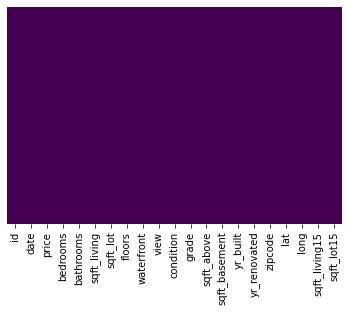

In [25]:
# Revisión de datos nulos
sns.heatmap(datos.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [26]:
# Determinación de X y y

In [2]:
X = datos.iloc[:, -2].values
y = datos.iloc[:, 2].values
print(X)
print(y)

[1340 1690 2720 ... 1020 1410 1020]
[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [3]:
# alpha = 0.000000000001
alpha = 0.0000000246

def get_prediction(slope, intercept, x_val):
    return slope * x_val + intercept

def get_theta(theta):
    intercept, slope = theta
    intercept_gradient = 0
    slope_gradient = 0
    m = len(y)
    for i in range(0, len(y)):
        x_val = X[i]
        y_val = y[i]
        y_predicted = get_prediction(slope, intercept, x_val)
        intercept_gradient += (y_predicted - y_val)
        slope_gradient += (y_predicted - y_val) * x_val
        
    new_intercept = intercept - alpha * intercept_gradient
    new_slope = slope - alpha * (1/m) * slope_gradient
    return [new_intercept, new_slope]
    
def calc_cost(theta):
    intercept, slope = theta
    sum = 0
    for i in range(0, len(y)):
        x_val = X[i]
        y_val = y[i]
        y_predicted = get_prediction(slope, intercept, x_val)
        diff_sq = (y_predicted - y_val) ** 2
        sum += diff_sq
        
    cost = sum / (2*len(y))
    return cost

def iterate():
    num_iteration = 0
    current_cost = None
    current_theta = [0, 0]
    
    while num_iteration < 500:
        if num_iteration % 10 == 0:
            print('current iteration: ', num_iteration)
            print('current cost: ', current_cost)
            print('current theta: ', current_theta)
        new_cost = calc_cost(current_theta)
        current_cost = new_cost
        new_theta = get_theta(current_theta)
        current_theta = new_theta
        num_iteration += 1
        
    print(f'After {num_iteration}, total cost is {current_cost}. Theta is {current_theta}')
    return current_theta
    
pendiente, intercepto = iterate()

current iteration:  0
current cost:  None
current theta:  [0, 0]
current iteration:  10
current cost:  65748753019.06798
current theta:  [1784.9885313545135, 188.4690597471159]
current iteration:  20
current cost:  46773435130.3227
current theta:  [2314.2169967006066, 247.8406588259962]
current iteration:  30
current cost:  44890912426.15378
current theta:  [2447.972740826044, 266.55407030468626]
current iteration:  40
current cost:  44703795484.385
current theta:  [2457.1961489740797, 272.46251298043995]
current iteration:  50
current cost:  44684843402.3269
current theta:  [2427.2176478374136, 274.33812812872003]
current iteration:  60
current cost:  44682571748.57543
current theta:  [2384.9113402865323, 274.943629215655]
current iteration:  70
current cost:  44681955039.1982
current theta:  [2338.7409926951864, 275.1491100398314]
current iteration:  80
current cost:  44681502921.470955
current theta:  [2291.372187981064, 275.22859946326815]
current iteration:  90
current cost:  4468

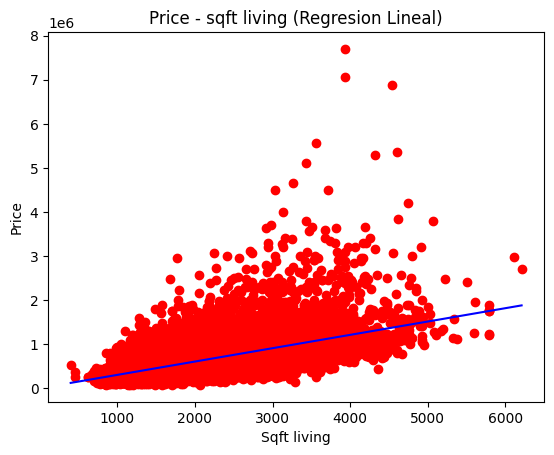

In [4]:
x_min = np.min(X)
x_max = np.max(X)
m = pendiente
b = intercepto
y_min = m*x_min + b
y_max = m*x_max + b

plt.scatter(X, y, color = 'red')
plt.plot([x_min, x_max], [y_min, y_max], color='blue')
plt.title('Price - sqft living (Regresion Lineal)')
plt.xlabel('Sqft living')
plt.ylabel('Price')
plt.show()

## Task 1.3
Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

root mean square error: 111837002788.6474
Price/ sqt_living  256762.24743724964
Precio estimado para 1000 pies cuadrados: 237682.03425726295


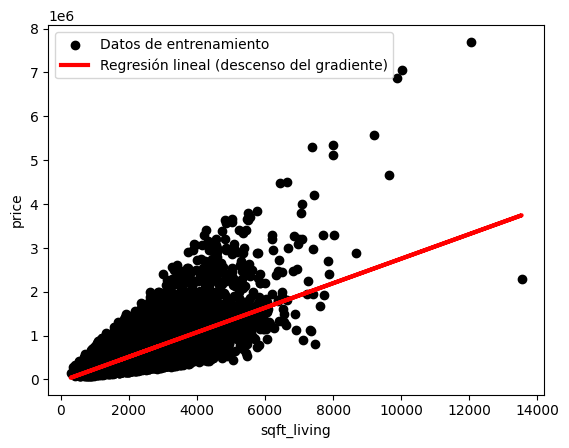

In [5]:
train_datos = datos.sample(frac=0.99, random_state=1)
test_datos = datos.drop(train_datos.index)

X_train = train_datos["sqft_living"].values.reshape(-1, 1)
y_train = train_datos["price"].values
X_test = test_datos["sqft_living"].values.reshape(-1, 1)
y_test = test_datos["price"].values

X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

theta = np.zeros(2)
alpha = 0.01
num_iterations = 1000

X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train_scaled]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test_scaled]

def compute_cost(X, y, theta):
    m = len(y)
    J = 1 / (2 * m) * np.sum((np.dot(X, theta) - y) ** 2)
    return J

for i in range(num_iterations):
    y_pred = np.dot(X_train_bias, theta)
    error = y_pred - y_train

    gradient = 1 / len(y_train) * np.dot(X_train_bias.T, error)
    theta -= alpha * gradient
    cost = compute_cost(X_train_bias, y_train, theta)
    # print("Iteración: {0}, Costo: {1}".format(i, cost))


y_pred_test = np.dot(X_test_bias, theta)
y_pred_train = np.dot(X_train_bias, theta)
mse = np.mean((y_pred_test - y_test) ** 2)
print("root mean square error:", mse)

print("Price/ sqt_living ", theta[1])

sqft = 1000
sqft_scaled = (sqft - X_mean[0]) / X_std[0]
price = theta[0] + theta[1] * sqft_scaled
print("Precio estimado para {0} pies cuadrados: {1}".format(sqft, price))

plt.scatter(X_train, y_train, color='black', label='Datos de entrenamiento')
plt.plot(X_train, y_pred_train, color='red', linewidth=3, label='Regresión lineal (descenso del gradiente)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.show()

## Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor
balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Se crea una semilla para que los datos sean los mismos en cada prueba con cada grado
np.random.seed(0)
# Definir los grados de los polinomios a probar
grados = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Usar validación cruzada para evaluar el desempeño del modelo para cada grado
cv_scores = []
for grado in grados:
    # Se crea un objeto polinomial con cada grado
    poly = PolynomialFeatures(degree=grado)
    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # Crear un modelo de regresión lineal y ejecutar validación cruzada con 5 divisiones
    model = LinearRegression()
    scores = cross_val_score(model, X_poly, y, cv=5)

    # Guardar el puntaje promedio de la validación cruzada para este grado de polinomio
    cv_scores.append(np.mean(scores))

# Encontrar el grado que da el mejor puntaje promedio de validación cruzada
best_degree = grados[np.argmax(cv_scores)]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X.reshape(-1, 1))

# Crear un modelo de regresión lineal y ejecutar validación cruzada con 5 divisiones
model = LinearRegression()
scores = cross_val_score(model, X_poly, y, cv=5)

print("Puntaje promedio: ", np.mean(scores))
print("Desviación estándar: ", np.std(scores))
print(f"El mejor grado del polinomio es: {best_degree}")



Puntaje promedio:  0.35932341513912586
Desviación estándar:  0.05015048553490368
El mejor grado del polinomio es: 4


## Task 1.5
Haga un análisis sobre sus hallazgos

Los resultados de las secciones anteriores nos llevan a las siguientes conclusiones: 

En la sección 1.2, gracias a la gráfica generada se pude observaar de mejor manera el comportamiento de los datos. Estos datos, según nuestro modelo, presentan un comportamiento lineal. 
Cabe resaltar la existencia de muchos puntos rojos lejanos a la línea azul, construida por nuestro modelo de regresión lineal, estos puntos rojos son datos atípicos que afectan y sesgan el modelo, pero a pesar de ellos, el modelo sigue siendo descrito por una función lineal.

En la sección 1.3, con un resultado gráfico visualmente similar al de la sección anterior, se pudo estimar que para 1000 sqft living se cobrarían poco más de 256762. Esta estimación se pudo realizar gracias a la linearidad de nuestro modelo, pero esta vez, para obtener estos nuevos resultados y estimaciones se hizo a partir de la gradiente de descenso, con 1000 iteraciones y un alfa de 0.01.

Finalmente, en la sección 1.4, gracias a la cross-validation pudimos determinar que el mejor grado del polinomio que descrbe a nuestro dataframe de datos. Esto gracias a luego de probar varios grados, el que el mejor puntaje tuvo para esta ocasión fue el polinomio de grado 4.
Cabe resaltar que del puntaje promedio de cada uno de los grados medidos, su deviación estándar es de 0.039, por lo que hubo muy poca varianza entre los resultados de cada grado. Esto nos indica que los resultados de cada polinomio estuvieron muy cercanos entre sí y que probablemente todos describen el comportamiento de los datos, pero que el polinomio de grado 4 lo hace mucho mejor. También es importante mencionar que el puntaje promedio fue 0.359 entre todos los grados que se aplicaron a los modelos, este puntaje, que se podría considerar bajo se debe a que el conjunto de datos que se ofreció para trabajar posee una estructura peculiar donde hay valores bastante dispersos por lo que era de esperarse que las pruebas realizadas tuvieran un alto porcentaje de error o bien las puntuaciones de los modelos fueran bajas. Sin embargo, consideramos que todo lo realizado permitió determinar la relación entre el precio de las casas y los pies cuadrados disponibles. 